In [1]:
from IPython.lib.display import YouTubeVideo

# Week 09, ASTR 496: Foundations of Data Science in Astronomy

## Autoregressive Processes, Gaussian Processes 

### Gautham Narayan 
##### <gsn@illinois.edu>

## Recap

If you get a time-series:

# $$ (t_1, m_1), (t_2, m_2), ... , (t_N, m_n) $$

- and you get luck enough to have a parametric model then you know what to do from first half of semester
- you can say something about the **correlation structure** (*even if no explicit model for observations*)
    - periodic processes
        - periodogram to find strong periods
        - can express as Fourier sum to construct a model and make predictions at future times
    - stochastic processes
        - ACF/SF
        - PSD
            - These are good for **characterizing** stochastic processes
                - can use *features* for tasks like *classification* (soon! week 11!) 
                
## But we're scientists and like to predict things (i.e. forecasting), not just characterize them - how do we do that for a generic time-series/process without an explicit model?

## Autoregressive Processes

Processes (like time-series) that "retain memory" of previous states, can be described by [autoregressive models](https://en.wikipedia.org/wiki/Autoregressive_model).

### You have already seen one of these:

Our old friend the random walk - every new value is given by the preceeding value plus some noise:

# $$y_i = y_{i-1} + \epsilon_i$$

If the coefficient of $y_{i-1}$ is $>1$ then it is known as a geometric random walk, which is typical of the stock market. These are **Markov Chains** 

(recall that not all Markov chains are stationary - they have to be positive recurrent and irreducible - i.e. you have to be able to get from every state to every other state in some finite time - it'd be dull if the stock market was stationary)

So, if you interview for a quant position on Wall Street, you tell them that you are an expert in using autoregressive geometric random walks to model stochastic processes.

In the random walk case above, each new value depends only on the immediately preceeding value.  But we can generalized this to include $p$ values:

# $$y_i = \sum_{j=1}^pa_jy_{i-j} + \epsilon_i$$

We refer to this as an [**autoregressive (AR)**](https://en.wikipedia.org/wiki/Autoregressive_model) process of order $p$: $AR(p)$.  

For a random walk, we have $p=1$, and the weights are just $a_1=1$.

If the data are drawn from a "stationary" process (one where it doesn't matter what region of the light curve you sample [so long as it is representative]), the $a_j$ satisfy certain conditions.

One thing that we might do then is ask whether a system is more consistent with $a_1=0$ or $a_1=1$ (noise vs. a random walk).

## An aside:

You might wonder why the stock market is well described by a geometric random walk, and doesn't need an AR(10) or something. Recall that geometric random walks are also good at describing the motions of inebriated humans. Most economic theory is based on the assumption of people being "Rational actors", leading to "Efficient Markets." 

Larry Summers would famously dispute this notion with the first line of a unpublished paper:
"There are idiots, look around."

Here are some example light curves for specific $AR(p)$ processes.  

![AR Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/1000px-ArTimeSeries.svg.png)

* $AR(0)$: the light curve is simply responding to noise fluctuations.  


* $AR(1)$: the noise fluctuation responses are persisting for slightly longer as the next time step depends positively on the time before.  


* $AR(1)$ w/ $a_1 = 0.9$: nearly the full effect of the noise spike from the previous time step is applied again, giving particularly long and high chains of peaks and valleys.  


* $AR(2)$:  we have long, but low chains of peaks and valleys as a spike persists for an extra time step.  


* $AR(2)$ w/ $a_1 = 0.9$ and $a_2 = -0.8$: the response of a spike in the second time step has the opposite sign as for the first time step - both have large coefficients - peaks and valleys are both quite high and quite narrowly separated.

i.e. More general than simple periodic processes

## Moving Average Processes

A [**moving average (MA)**](https://en.wikipedia.org/wiki/Moving-average_model) process is similar to an AR process, but instead the value at each time step depends not on the *value* of previous time step, but rather the *perturbations* from previous time steps.  It is defined as

# $$y_i = \epsilon_i + \sum_{j=1}^qb_j\epsilon_{i-j}$$

So, for example, an MA(q=1) process would look like

# $$y_i = \epsilon_{i} + b_1\epsilon_{i-1},$$

whereas an AR(p=2) process would look like

# $$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i$$


### So, in an $MA$ process a shock affects only the current value and $q$ values into the future.  In an $AR$ process a shock affects *all* future values. 

## You can combine AR and MA processes. These are creatively called ARMA processes

E.g. ARMA(2,1) model, which combines AR(2) and MA(1):


# $$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i + b_1 \epsilon_{i-1}$$

# In-class Exercise: AR vs MA vs ARMA processes with a single shock

Generate data from 
* an $AR(2)$ w/ $a_1 = 0.5, a_2=0.2$
* an $MA(2)$ w/ $b_1 = 0.5, b_2=0.5$
* an $ARMA(2, 1)$ w/ $a_1 = 0.5, a_2=0.25, b_1 =0.5$

Add a "shock" (high epsilon value at t=3 - see how the different procsses respond

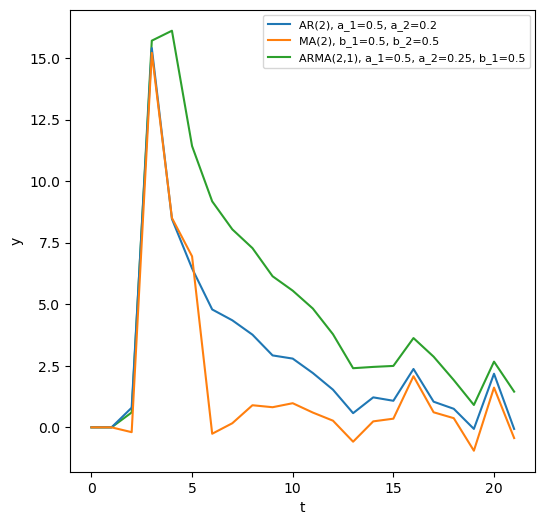

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

N=20

epsilon = np.random.randn(N+2) # complete me
epsilon[3] = 15 # complete me


yAR=np.zeros(N+2)
yMA=np.zeros(N+2)
yARMA=np.zeros(N+2)

for i in np.arange(N)+2:

    yAR[i] = 0.5*yAR[i-1] + 0.2*yAR[i-2] + epsilon[i] # complete me 
    yMA[i] = 0.5*epsilon[i-1]  + 0.5*epsilon[i-2] + epsilon[i] # complete me
    yARMA[i] = 0.5*yARMA[i-1] + 0.25*yARMA[i-2] + 0.5*epsilon[i-1] + epsilon[i] # complete me

fig = plt.figure(figsize=(6, 6))
t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a_1=0.5, a_2=0.2")
plt.plot(t,yMA,label="MA(2), b_1=0.5, b_2=0.5")
plt.plot(t,yARMA,label="ARMA(2,1), a_1=0.5, a_2=0.25, b_1=0.5",zorder=0)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",prop={'size':8})
plt.show()

These videos might be useful:

[MA(1)](https://www.youtube.com/watch?v=lUhtcP2SUsg)

[AR(1)](https://www.youtube.com/watch?v=AN0a58F6cxA)

[ARMA(1,1)](https://www.youtube.com/watch?v=Pg0RnP1uLVc)

### CARMA Models

$AR$ and $ARMA$ models assume evenly sampled time-series data.  However, we can extend this to unevenly sampled data.

These are **continuous** ARMA or CARMA models.


A $CAR(1)$ process is described by a stochastic differential equation which includes a damping term that pushes $y(t)$ back towards the mean, so it is also a **damped random walk (DRW)**.  

For evenly sampled data a CAR(1) process is the same as an AR(1) process with $a_1=\exp(-1/\tau)$.  

That is, the next value is the previous value times the damping factor (plus noise).

### Connecting this back to the ACF/SF/PSD

The ACF for a DRW is given by
# $$ ACF(t) = \exp(-t/\tau),$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale).

The structure function can be written as
# $$ SF(t) = SF_{\infty}[1-\exp(-t/\tau)]^{1/2}.$$

The PSD is then
# $$ PSD(f) = \frac{\tau^2 SF_{\infty}^2}{1+(2\pi f \tau)^2},$$


which means that a DRW is a $1/f^2$ process at high frequency.  

The *damped* part comes from the flat PSD at low frequency.

# So if you have a correlation function, how do you get to $y(t)$?


A stochastic process is collection of variables drawn from _a probability distribution over functions_.

In other words, if our function of interest is $y(t)$, a stochastic process assigns probabilities $P\left[y(t)\right]$.

### Gaussian Processes

A Gaussian process has the property that

$P\left[y(x) | y(x_1), y(x_2), \ldots\right]$

is a Gaussian depending on the $x_i$ and $y(x_i)$. The process is specified by a "mean function" $\mu(x)$ and a "covariance function" $C(x)$, or "kernel," which determines how quickly $y(x)$ can vary.

### Gaussian Processes in Data Analysis

A draw from $P[y(x^*)]$ would represent a prior prediction for the function value $y(x^*)$

Typically we are more interested in the posterior prediction, drawn from $P[y(x^*)\vert y^{\rm obs}(x_{\rm obs})]$

# $$ \log L = - \log | \Sigma| - |y -u|^T \Sigma^{-1} |y-u|$$


# $$ \Sigma = (n x n)\text{ matrix}$$ 

with 

# $$ \Sigma_{i,j} = \text{Cov}(y(t_i), y(t_j)) = \int_{-\infty}^{\infty} \text{PSD} e^{2\pi if |t_i - t_j|} \,df $$



The posterior PDF for $y(x^*)$ is a Gaussian, whose mean and standard deviation can be computed algebraically, and which is constrained by _all the previously observed $y(x)$_.


<img src="mfm_gp_example.png"> 

### GP Regression

GP's provide a natural way to achieve high flexibility (and uncertainty) when _interpolating_ data. 

With the appropriate assumptions (e.g. Gaussian measurement errors), the calculation of the posterior for $y(x)$ is an _algebraic_ operation (no Monte Carlo required).

Marginalization over the GP hyperparameters (the width of the kernel, for example) is more computationally expensive (involving the determinants of the matrices), but [fast methods have been developed](http://dan.iel.fm/george/current/user/hyper/).

## Model "free" models - aka "non-parametric models"


Sometimes we simply don't have a good first-principles model for what's going on in our data, but we're also confident that making a simple assumption (e.g. Gaussian scatter) is dead wrong.

### What does "model-free" mean?

In these situations, we're motivated to avoid strong modeling assumptions and instead be more empirical.

Common adjectives:
* non-parametric
* model-independent
* data-driven
* empirical

(Strictly speaking, these tend to correspond to models with very many parameters, but the terminology persists.)

Gaussian processes appear to be "non-parametric" because the algebraic evaluation of the posterior PDF includes analytic marginalization over all the (nuisance) parameters in the model (the true values of $y$ at each $x_{\rm obs}$).

As with all non-parametric models, GPs are not "assumption-free" or "model-independent": they are just not _simply_ or _physically_ parametrized, and so involve different _types_ of assumptions.

The trade-off between simply-parametrized and non-parametric models is between _interpretability_ (typically high for simply-parametrized physical models) and _prediction accuracy_ (typically high for non-parametric models).

# In-class exercise: A full worked example of a GP

We'll work through this.

## The Data

Let's generate a simple Cepheids-like dataset: observations of $y$ with reported uncertainties $\sigma_y$, at given $x$ values.

In [3]:
# RUN THIS

import numpy as np
import pylab as plt

xlimits = [0,350]
ylimits = [0,250]

def generate_data(seed=None):
    """
    Generate a 30-point data set, with x and sigma_y as standard, but with
    y values given by

    y = a_0 + a_1 * x + a_2 * x**2 + a_3 * x**3 + noise
    """
    Ndata = 30

    xbar = 0.5*(xlimits[0] + xlimits[1])
    xstd = 0.25*(xlimits[1] - xlimits[0])

    if seed is not None:
        np.random.seed(seed=seed)

    x = xbar + xstd * np.random.randn(Ndata)

    meanerr = 0.025*(xlimits[1] - xlimits[0])

    sigmay = meanerr + 0.3 * meanerr * np.abs(np.random.randn(Ndata))

    a = np.array([37.2,0.93,-0.002,0.0])
    y = a[0] + a[1] * x + a[2] * x**2 + a[3] * x**3 + sigmay*np.random.randn(len(x))

    return x,y,sigmay

def plot_yerr(x, y, sigmay):
    """
    Plot an (x,y,sigma) dataset as a set of points with error bars 
    """
    plt.errorbar(x, y, yerr=sigmay, fmt='.', ms=7, lw=1, color='k')
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$y$', fontsize=16)
    plt.xlim(*xlimits)
    plt.ylim(*ylimits)
    return

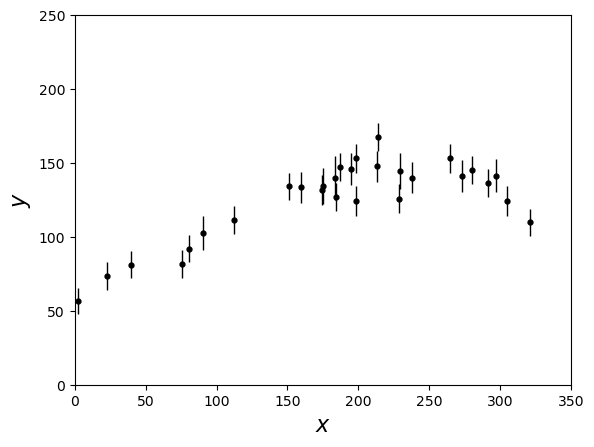

In [4]:
(x, y, sigmay) = generate_data(seed=10)

plot_yerr(x, y, sigmay)

## Fitting a Gaussian Process

Let's follow [Jake VanderPlas' example](http://www.astroml.org/book_figures/chapter8/fig_gp_example.html#book-fig-chapter8-fig-gp-example), to see how to work with the [`scikit-learn` v0.18](http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#gaussian-processes-regression-basic-introductory-example) Gaussian Process regression model.

In [5]:
# RUN THIS
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF as SquaredExponential


### Defining a GP

First we define a kernel function, for populating the covariance matrix of our GP. To avoid confusion, a Gaussian kernel is referred to as a "squared exponential" (or a "radial basis function", RBF). The squared exponential kernel has one hyper-parameter, the length scale that is the Gaussian width.

In [6]:
h = 10.0

kernel = SquaredExponential(length_scale=h, length_scale_bounds=(0.01, 1000.0))
gp0 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


Now, let's draw some samples from the unconstrained process, o equivalently, the prior. Each sample is a function $y(x)$, which we evaluate on a grid. We'll need to assert a value for the kernel hyperparameter $h$, which dictates the correlation length between the datapoints. That will allow us to compute a mean function (which for simplicity we'll set to the mean observed $y$ value), and a covariance matrix that captures the correlations between datapoints.

In [7]:
np.random.seed(1)
xgrid = np.atleast_2d(np.linspace(0, 399, 100)).T
print("y(x) will be predicted on a grid of length", len(xgrid))

# Draw three sample y(x) functions:
draws = gp0.sample_y(xgrid, n_samples=3)

print("Drew 3 samples, stored in an array with shape ", draws.shape)

y(x) will be predicted on a grid of length 100
Drew 3 samples, stored in an array with shape  (100, 3)


Let's plot these, to see what our prior looks like.


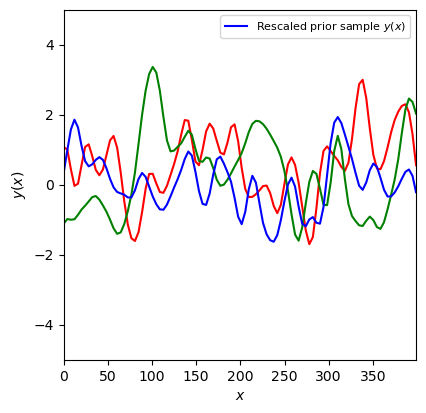

In [8]:
# Start a 4-panel figure:
fig = plt.figure(figsize=(10,10))

# Plot our three prior draws:
ax = fig.add_subplot(221)
ax.plot(xgrid, draws[:,0], '-r')
ax.plot(xgrid, draws[:,1], '-g')
ax.plot(xgrid, draws[:,2], '-b', label='Rescaled prior sample $y(x)$')
ax.set_xlim(0, 399)
ax.set_ylim(-5, 5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y(x)$')
ax.legend(fontsize=8);

Each predicted $y(x)$ is drawn from a Gaussian of unit variance, and with off-diagonal elements determined by the covariance function. 

Try changing `h` to see what happens to the smoothness of the predictions. 

> Go back up to the cell where `h` is assigned, and re-run that cell and the subsequent ones.

For our data to be well interpolated by this Gaussian Process, it will need to be rescaled such that it has zero mean and unit variance. There are [standard methods for doing this](http://scikit-learn.org/stable/modules/preprocessing.html), but we'll do this rescaling here for transparency - and so we know what to add back in later!

In [9]:
class Rescale():
    def __init__(self, y, err):
        self.original_data = y
        self.original_err = err
        self.mean = np.mean(y)
        self.std = np.std(y)
        self.transform()
        return
    def transform(self):
        self.y = (self.original_data - self.mean) / self.std
        self.err = self.original_err / self.std
        return()
    def invert(self, scaled_y, scaled_err):
        return (scaled_y * self.std + self.mean, scaled_err * self.std)     

In [10]:
rescaled = Rescale(y, sigmay)
print('Mean, variance of original data: ',np.round(np.mean(y)), np.round(np.var(y)))
print('Mean, variance of rescaled data: ',np.round(np.mean(rescaled.y)), np.round(np.var(rescaled.y)))

Mean, variance of original data:  125.0 698.0
Mean, variance of rescaled data:  0.0 1.0


In [11]:
y2, sigmay2 = rescaled.invert(rescaled.y, rescaled.err)
print('Mean, variance of inverted, rescaled data: ',np.round(np.mean(y2)), np.round(np.var(y2)))
print('Maximum differences in y, sigmay, after round trip: ',np.max(np.abs(y2 - y)), np.max(np.abs(sigmay2 - sigmay)))

Mean, variance of inverted, rescaled data:  125.0 698.0
Maximum differences in y, sigmay, after round trip:  0.0 1.7763568394002505e-15


### Constraining the GP

Now, using the same covariance function, lets "fit" the GP by constraining each draw from the GP to go through our data points, and _optimizing_ the length scale hyperparameter `h`. 

Let's first look at how this would work for two data points with no uncertainty. 

In [12]:
# Choose two of our (rescaled) datapoints:
x1 = np.array([x[10], x[12]])
rescaled_y1 = np.array([rescaled.y[10], rescaled.y[12]])
rescaled_sigmay1 = np.array([rescaled.err[10], rescaled.err[12]])

# Instantiate a GP model, with initial length_scale h=10:
kernel = SquaredExponential(length_scale=10.0, length_scale_bounds=(0.01, 1000.0))
gp1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit it to our two noiseless datapoints:
gp1.fit(x1[:, None], rescaled_y1)

# We have fit for the length scale parameter: print the result here:
params = gp1.kernel_.get_params()
print('Best-fit kernel length scale =', params['length_scale'],'cf. input',10.0)

# Now predict y(x) everywhere on our xgrid: 
rescaled_ygrid1, rescaled_ygrid1_err = gp1.predict(xgrid, return_std=True)

# And undo scaling, of both y(x) on our grid, and our two constraining data points:
ygrid1, ygrid1_err = rescaled.invert(rescaled_ygrid1, rescaled_ygrid1_err)
y1, sigmay1 = rescaled.invert(rescaled_y1, rescaled_sigmay1)

Best-fit kernel length scale = 10.000000000000002 cf. input 10.0


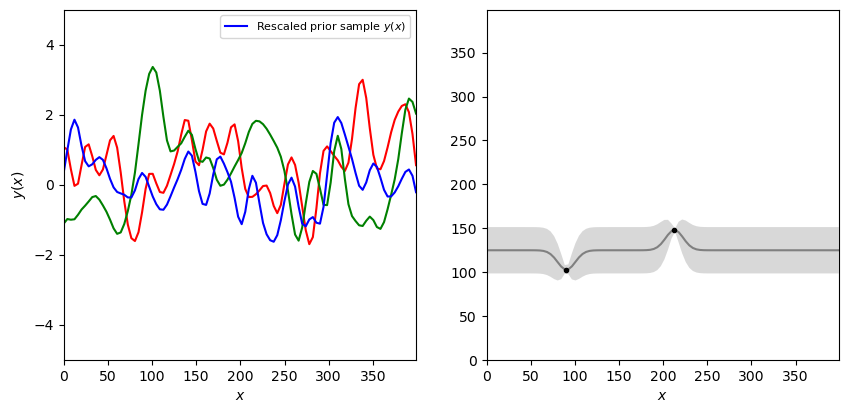

In [13]:
ax = fig.add_subplot(222)
ax.plot(xgrid, ygrid1, '-', color='gray', label='Posterior mean $y(x)$')
ax.fill(np.concatenate([xgrid, xgrid[::-1]]),
        np.concatenate([(ygrid1 - ygrid1_err), (ygrid1 + ygrid1_err)[::-1]]),
        alpha=0.3, fc='gray', ec='None', label='68% confidence interval')
ax.plot(x1, y1, '.k', ms=6, label='Noiseless constraints')
ax.set_xlim(0, 399)
ax.set_ylim(0, 399)
ax.set_xlabel('$x$')
fig

In the absence of information, the GP tends to produce $y(x)$ that fluctuate around the prior mean function, which we chose to be a constant. Let's draw some samples from the posterior PDF, and overlay them.

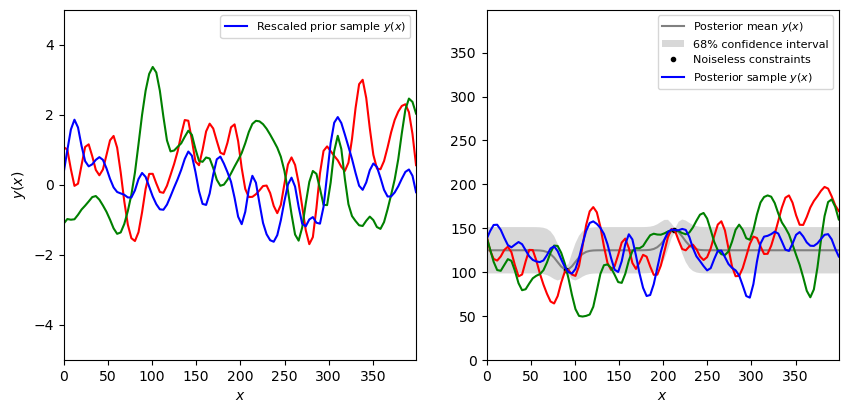

In [14]:
draws = gp1.sample_y(xgrid, n_samples=3)
for k in range(3):
    draws[:,k], dummy = rescaled.invert(draws[:,k], np.zeros(len(xgrid)))

ax.plot(xgrid, draws[:,0], '-r')
ax.plot(xgrid, draws[:,1], '-g')
ax.plot(xgrid, draws[:,2], '-b', label='Posterior sample $y(x)$')
ax.legend(fontsize=8)
fig

See how the posterior sample $y(x)$ functions all pass through the constrained points.

In [15]:
# Choose two of our datapoints:
x2 = np.array([x[10], x[12]])
rescaled_y2 = np.array([rescaled.y[10], rescaled.y[12]])
rescaled_sigmay2 = np.array([rescaled.err[10], rescaled.err[12]])

# Instantiate a GP model, including observational errors:
kernel = SquaredExponential(length_scale=10.0, length_scale_bounds=(0.01, 1000.0))
gp2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, 
                               alpha=(rescaled_sigmay2 / rescaled_y2) ** 2,
                               random_state=0)

# Fit it to our two noisy datapoints:
gp2.fit(x2[:, None], rescaled_y2)

# We have fit for the length scale parameter: print the result here:
params = gp2.kernel_.get_params()
print('Best-fit kernel length scale =', params['length_scale'],'cf. input',10.0)

# Now predict y(x) everywhere on our xgrid: 
rescaled_ygrid2, rescaled_ygrid2_err = gp2.predict(xgrid, return_std=True)

# And undo scaling:
ygrid2, ygrid2_err = rescaled.invert(rescaled_ygrid2, rescaled_ygrid2_err)
y2, sigmay2 = rescaled.invert(rescaled_y2, rescaled_sigmay2)

# Draw three posterior sample y(x):
draws = gp2.sample_y(xgrid, n_samples=3)
for k in range(3):
    draws[:,k], dummy = rescaled.invert(draws[:,k], np.zeros(len(xgrid)))

Best-fit kernel length scale = 10.000000000000002 cf. input 10.0


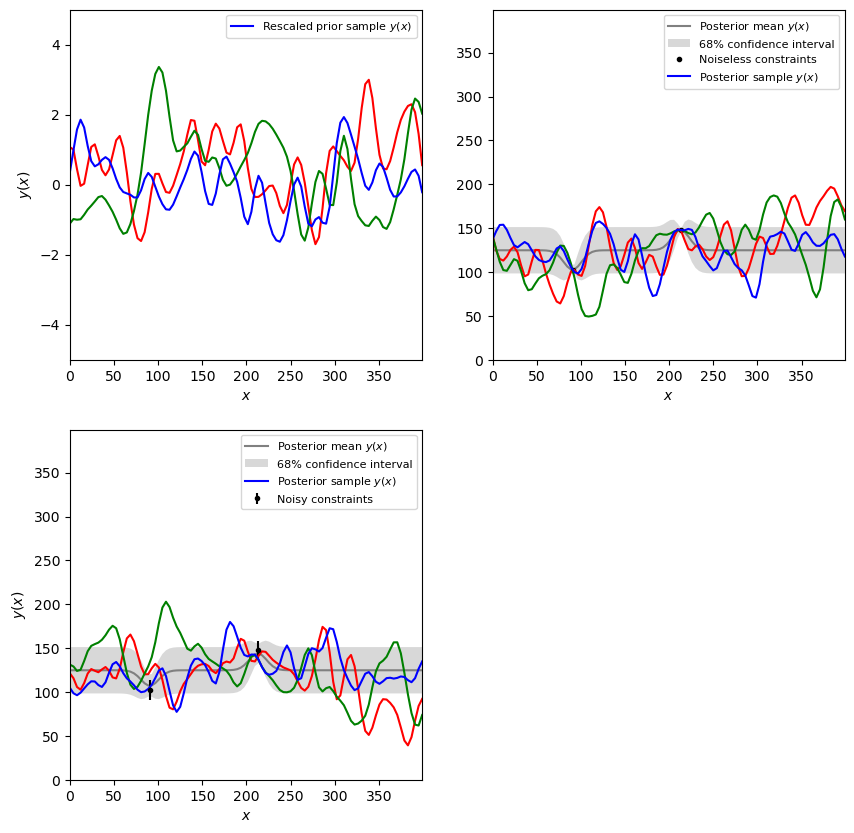

In [16]:
ax = fig.add_subplot(223)

def gp_plot(ax, xx, yy, ee, datax, datay, datae, samples, legend=True):
    ax.cla()
    ax.plot(xx, yy, '-', color='gray', label='Posterior mean $y(x)$')
    ax.fill(np.concatenate([xx, xx[::-1]]),
            np.concatenate([(yy - ee), (yy + ee)[::-1]]),
            alpha=0.3, fc='gray', ec='None', label='68% confidence interval')
    ax.errorbar(datax, datay, datae, fmt='.k', ms=6, label='Noisy constraints')
    ax.set_xlim(0, 399)
    ax.set_ylim(0, 399)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y(x)$')
    ax.plot(xgrid, samples[:,0], '-r')
    ax.plot(xgrid, samples[:,1], '-g')
    ax.plot(xgrid, samples[:,2], '-b', label='Posterior sample $y(x)$')
    if legend: ax.legend(fontsize=8)
    return

gp_plot(ax, xgrid, ygrid2, ygrid2_err, x2, y2, sigmay2, draws, legend=True)
fig

Now, the posterior sample $y(x)$ functions pass through the constraints _within the errors_.

### Using all the Data

Now let's extend the above example to use all of our datapoints. This additional information should pull the predictions further away from the initial mean function. We'll also compute the marginal log likelihood of the best fit hyperparameter, in case we want to compare this choice of kernel with another one (in the exercises, for example).

In [17]:
# Use all of our datapoints:
x3 = x
rescaled_y3 = rescaled.y
rescaled_sigmay3 = rescaled.err

# Instantiate a GP model, including observational errors:
kernel = SquaredExponential(length_scale=10.0, length_scale_bounds=(0.01, 1000.0))
# Could comment this out, and then import and use an 
# alternative kernel here. 

gp3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, 
                               alpha=(rescaled_sigmay3 / rescaled_y3) ** 2,
                               random_state=0)

# Fit it to our noisy datapoints:
gp3.fit(x3[:, None], rescaled_y3)

# Now predict y(x) everywhere on our xgrid: 
rescaled_ygrid3, rescaled_ygrid3_err = gp3.predict(xgrid, return_std=True)

# And undo scaling:
ygrid3, ygrid3_err = rescaled.invert(rescaled_ygrid3, rescaled_ygrid3_err)
y3, sigmay3 = rescaled.invert(rescaled_y3, rescaled_sigmay3)

# We have fitted the length scale parameter - print the result here:
params = gp3.kernel_.get_params()
print('Kernel: {}'.format(gp3.kernel_))
print('Best-fit kernel length scale =', params['length_scale'],'cf. input',10.0)
print('Marginal log-Likelihood: {:.3f}'.format(gp3.log_marginal_likelihood(gp3.kernel_.theta)))

# Draw three posterior sample y(x):
draws = gp3.sample_y(xgrid, n_samples=3)
for k in range(3): 
    draws[:,k], dummy = rescaled.invert(draws[:,k], np.zeros(len(xgrid)))

Kernel: RBF(length_scale=77)
Best-fit kernel length scale = 76.9901571633585 cf. input 10.0
Marginal log-Likelihood: -38.920


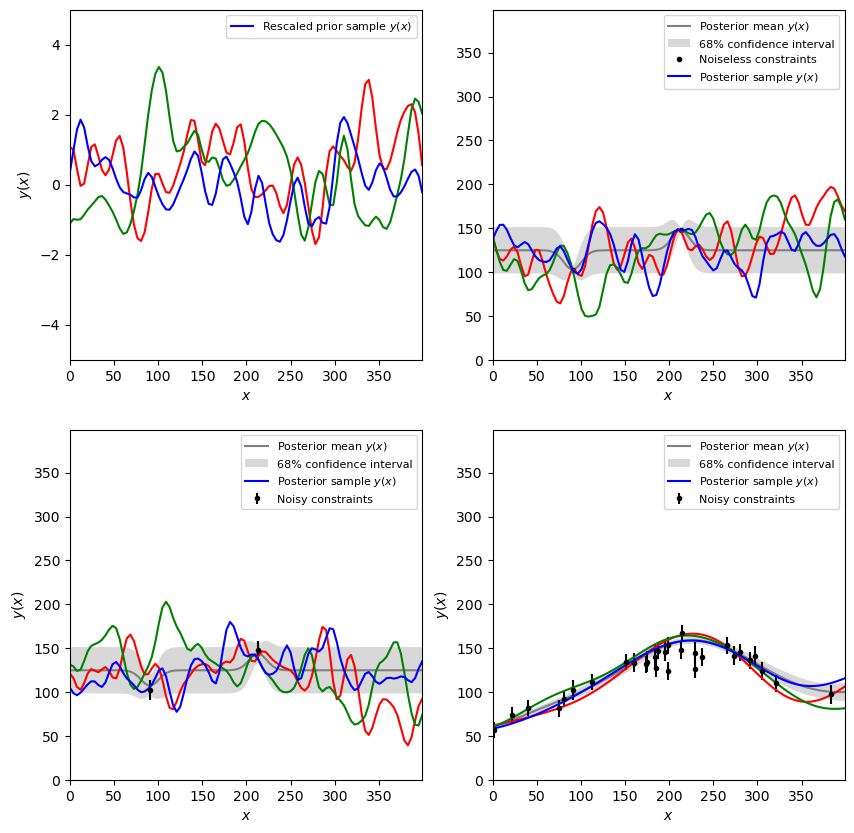

In [18]:
ax = fig.add_subplot(224)

gp_plot(ax, xgrid, ygrid3, ygrid3_err, x3, y3, sigmay3, draws, legend=True)
fig

We now see the Gaussian Process model providing a smooth interpolation between the points. The posterior samples show fluctuations, but all are plausible under our assumptions.